In [ ]:
!pip install transformers
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=6d93e667471428bb4a4d33e7334e374a069ae0d111ee8702c2a438104e124934
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score


In [ ]:
text = open("/content/MonekyPawsStory - Copy.txt", "r")

In [ ]:
read = text.read()

In [ ]:
import textwrap

wrapper = textwrap.TextWrapper(width=80, break_long_words=False, break_on_hyphens=False)
print(wrapper.fill(read))
modifiedText = wrapper.fill(read)

﻿  THE MONKEY’S PAW     I.   Without, the night was cold and wet, but in the
small parlour of Laburnam Villa the blinds were drawn and the fire burned
brightly. Father and son were at chess, the former, who possessed ideas about
the game involving radical changes, putting his king into such sharp and
unnecessary perils that it even provoked comment from the white-haired old lady
knitting placidly by the fire.  “Hark at the wind,” said Mr. White, who, having
seen a fatal mistake after it was too late, was amiably desirous of preventing
his son from seeing it.  “I’m listening,” said the latter, grimly surveying the
board as he stretched out his hand. “Check.”  “I should hardly think that he’d
come to-night,” said his father, with his hand poised over the board.  “Mate,”
replied the son.  “That’s the worst of living so far out,” bawled Mr. White,
with sudden and unlooked-for violence; “of all the beastly, slushy,
out-of-the-way places to live in, this is the worst. Pathway’s a bog, and th

In [ ]:
from transformers import pipeline


model = "google-t5/t5-small"
pipe = pipeline("summarization", model=model, tokenizer=model, device=-1)
outputs = pipe(modifiedText, max_length=512, clean_up_tokenization_spaces=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (6037 > 512). Running this sequence through the model will result in indexing errors
Both `max_new_tokens` (=256) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


In [ ]:
print(wrapper.fill(outputs[0]['summary_text']))

the talisman's paw shook his head as he walked to the door. he said he had a
paw, but he didn't know what he wanted. his wife sat down in the darkness, and
he looked at the old man's face. she cried, wildly, as she waited for him to
come home.


In [ ]:
summary1 = open("/content/Summary1.txt", "r") #AI Summary
summary2 = open("/content/Summary2.txt", "r") #Wikipedia Summary
summary3 = open("/content/Summary3.txt", "r") #My Summary

In [ ]:
summary1_read = summary1.read()
summary2_read = summary2.read()
summary3_read = summary3.read()

In [ ]:
print(wrapper.fill(summary1_read))
summary1Mod = wrapper.fill(summary1_read)

"The Whites receive a mysterious monkey's paw from Sergeant-Major Morris. They
wish for 200 pounds, and their son Herbert dies in an accident, with
compensation of 200 pounds. Mrs. White wishes for Herbert to be alive again, but
Mr. White makes a third wish to send him back before he arrives, leaving the
street deserted."


In [ ]:
print(wrapper.fill(summary2_read))
summary2Mod = wrapper.fill(summary2_read)

Mr White and Mrs. White, and their grown son, Herbert, are visited by
Sergeant-Major Morris, a friend who served with the British Army in India.
During dinner, he introduces them to a mummified monkey's paw. He explains how
an old fakir has placed a spell on the paw, so that it will grant three wishes
but only with hellish consequences as punishment for tampering with fate.
Morris, having had a horrible experience using the paw, throws it into the fire,
but the sceptical Mr. White retrieves it. Before leaving, Morris warns Mr. White
of what might happen should he use the paw.  Mr. White hesitates at first,
believing that he already has everything he wants. At Herbert's suggestion, Mr.
White flippantly wishes for £200, which will enable him to make the final
mortgage payment for his house; he then drops the paw, saying it moved and
twisted like a snake. The following day, Herbert leaves for work. That night, a
representative of Herbert's employer arrives at the Whites' home, telling the

In [ ]:
print(wrapper.fill(summary3_read))
summary3Mod = wrapper.fill(summary3_read)

The Whites recieved a magical item called the Monkey's Paw that grant wishes to
the user. The Whites first wish for 200 pounds. When they recieved news that
their son died in a workplace accident, they recieved 200 pounds as
compensation. Wishing for their son back alive, a mysterious knock appears at
their door. Fearing for their lives, the Whites made their last wish and the
knocking stopped.


In [ ]:
from rouge_score import rouge_scorer

generated_summary = wrapper.fill(outputs[0]['summary_text'])
reference_summaries = [summary1Mod, summary2Mod, summary3Mod]

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'], use_stemmer=True)

scores = {key: [] for key in ['rouge1', 'rouge2', 'rougeL', 'rougeLsum']}
for ref in reference_summaries:
    temp_scores = scorer.score(ref, generated_summary)
    for key in temp_scores:
        scores[key].append(temp_scores[key])

for key in scores:
    print(f'{key}:\n{scores[key]}')

rouge1:
[Score(precision=0.24074074074074073, recall=0.22807017543859648, fmeasure=0.23423423423423423), Score(precision=0.6111111111111112, recall=0.10679611650485436, fmeasure=0.18181818181818182), Score(precision=0.25925925925925924, recall=0.2028985507246377, fmeasure=0.22764227642276422)]
rouge2:
[Score(precision=0.018867924528301886, recall=0.017857142857142856, fmeasure=0.018348623853211007), Score(precision=0.1320754716981132, recall=0.022727272727272728, fmeasure=0.038781163434903045), Score(precision=0.03773584905660377, recall=0.029411764705882353, fmeasure=0.03305785123966942)]
rougeL:
[Score(precision=0.12962962962962962, recall=0.12280701754385964, fmeasure=0.12612612612612614), Score(precision=0.3888888888888889, recall=0.06796116504854369, fmeasure=0.11570247933884296), Score(precision=0.16666666666666666, recall=0.13043478260869565, fmeasure=0.14634146341463414)]
rougeLsum:
[Score(precision=0.18518518518518517, recall=0.17543859649122806, fmeasure=0.18018018018018017),

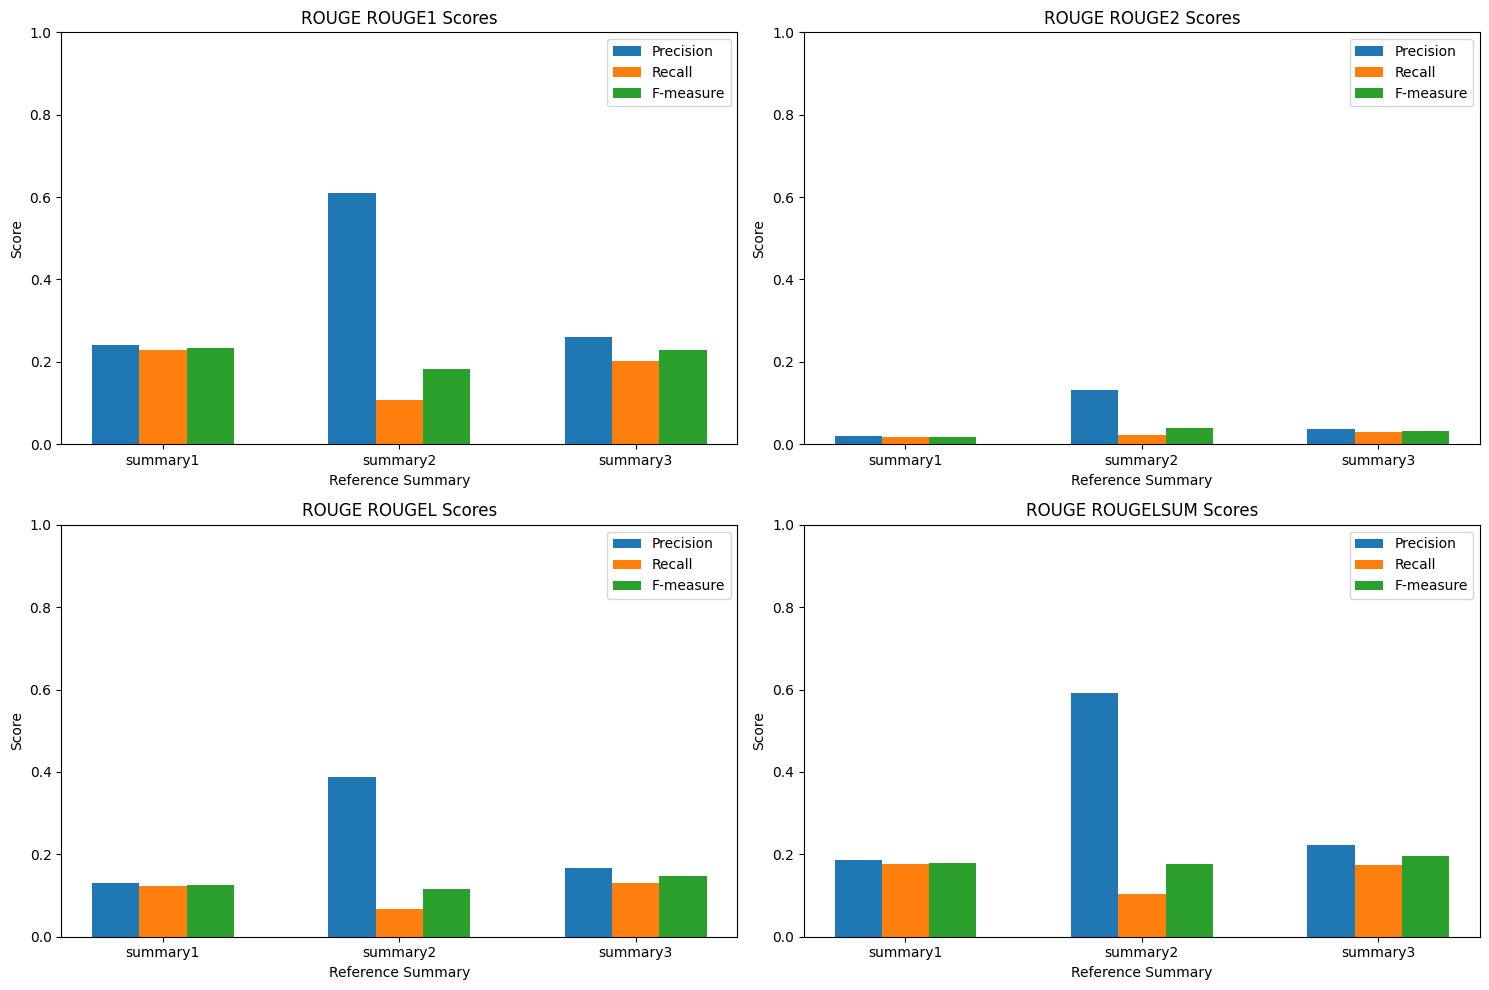

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

all_scores = []
for ref in reference_summaries:
    temp_scores = scorer.score(ref, generated_summary)
    all_scores.append(temp_scores)

rouge_types = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum']
metrics = ['precision', 'recall', 'fmeasure']
num_references = len(all_scores)

plot_data = {rt: {m: [] for m in metrics} for rt in rouge_types}

for scores_for_ref in all_scores:
    for rt in rouge_types:
        plot_data[rt]['precision'].append(scores_for_ref[rt].precision)
        plot_data[rt]['recall'].append(scores_for_ref[rt].recall)
        plot_data[rt]['fmeasure'].append(scores_for_ref[rt].fmeasure)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

bar_width = 0.2
index = np.arange(num_references)

for i, rt in enumerate(rouge_types):
    ax = axes[i]
    ax.bar(index, plot_data[rt]['precision'], bar_width, label='Precision')
    ax.bar(index + bar_width, plot_data[rt]['recall'], bar_width, label='Recall')
    ax.bar(index + 2 * bar_width, plot_data[rt]['fmeasure'], bar_width, label='F-measure')

    ax.set_xlabel('Reference Summary')
    ax.set_ylabel('Score')
    ax.set_title(f'ROUGE {rt.upper()} Scores')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels([f'summary{j+1}' for j in range(num_references)])
    ax.legend()
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()